In [40]:
import pandas as pd
import numpy as np 


In [41]:
import os
print(os.getcwd()) 

c:\Users\KIIT0001\OneDrive\Desktop\pp


In [42]:
url = "https://raw.githubusercontent.com/Supriyaranigouda/hate_speech/main/train.csv"
dataset = pd.read_csv(url)

dataset.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [44]:
dataset.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [46]:
dataset.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [47]:
dataset["labels"]=dataset["class"].map({0:"Hate speech",1:"offensive speech",2:"neither"})

In [48]:
dataset

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive speech
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive speech
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive speech
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive speech
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive speech
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",neither
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,offensive speech
24781,6,0,6,0,1,youu got wild bitches tellin you lies,offensive speech


In [49]:
data=dataset[["tweet","labels"]]

In [50]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive speech
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive speech
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive speech
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive speech
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive speech
24779,"you've gone and broke the wrong heart baby, an...",neither
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive speech
24781,youu got wild bitches tellin you lies,offensive speech


In [51]:
import re

import nltk 
nltk.download('stopwords')
#deal with english  like synoname etc
import string


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT0001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
#removal of stop words and stemming the words
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
stemmer=nltk.SnowballStemmer("english")


In [53]:
#Data cleaning process
def clean_data(text):
    text=str(text).lower()
    text=re.sub('https?://\S+|www\.S',''.text)
    text=re.sub('\[.*?\]','',text)
    text=re.sub('<.>*?+','',text)
    text=re.sub('[%S]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
   #stop word removal
    text=[word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    #stemming
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [54]:
import re
import string

# Example stopwords and stemmer (you can replace with nltk's or your own)
stopwords = set(["the", "and", "is", "in", "to", "of"])  # use nltk.corpus.stopwords for full list
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def clean_data(text):
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)

    # Remove line breaks
    text = re.sub(r'\n', '', text)

    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords]

    #  stemming
    words = [stemmer.stem(word) for word in words]

    return " ".join(words)


In [55]:
data = data.copy()
data["tweet"] = data["tweet"].apply(clean_data)


In [56]:
data



,tweet,labels
0,rt mayasolov as a woman you shouldnt complain ...,neither
1,rt boy dat coldtyga dwn bad for cuffin dat hoe...,offensive speech
2,rt urkindofbrand dawg rt you ever fuck a bitch...,offensive speech
3,rt cganderson vivabas she look like a tranni,offensive speech
4,rt shenikarobert shit you hear about me might ...,offensive speech
...,...,...
24778,you a muthafin lie coreyemanuel right hi tl tr...,offensive speech
24779,youv gone broke wrong heart babi drove me redn...,neither
24780,young buck wanna eat dat nigguh like i aint fu...,offensive speech
24781,youu got wild bitch tellin you lie,offensive speech


In [57]:
x=np.array(data["tweet"])
y=np.array(data["labels"])
                                                    

In [58]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\kiit0001\appdata\local\programs\python\python310\lib\site-packages (1.7.0)




[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [60]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [61]:
x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 269746 stored elements and shape (24783, 25759)>

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [63]:
#buiding ml model
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [65]:
y_pred=dt.predict(x_test)

In [66]:
#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 158,   38,  269],
       [  76, 1099,  204],
       [ 249,  253, 5833]])

In [67]:
import matplotlib
import seaborn
print(matplotlib.__file__)
print(seaborn.__file__)


c:\Users\KIIT0001\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\__init__.py
c:\Users\KIIT0001\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\__init__.py


In [68]:
import seaborn as sns

In [69]:
import matplotlib.pylab as ply


<Axes: >

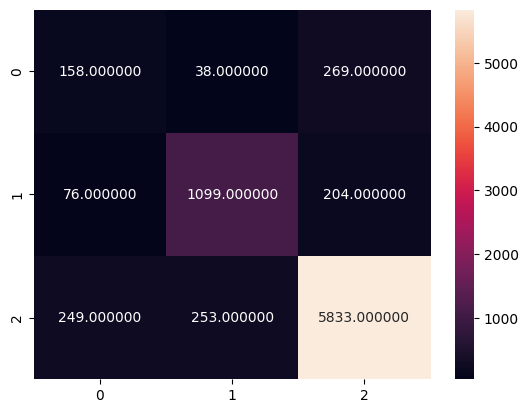

In [70]:
sns.heatmap(cm,annot = True,fmt="f")

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8668541386477564

In [72]:
# sample to test
sample = "Lets's unit and kill the people who are against us"

In [73]:
data1 = cv.transform([sample]).toarray()

In [74]:
data1


array([[0, 0, 0, ..., 0, 0, 0]])

In [75]:

import tensorflow

In [76]:
import matplotlib
import seaborn
print(matplotlib.__version__)
print(seaborn.__version__)


3.10.3
0.13.2
